In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv('C:\PythonDSA\data_viz\ds_salaries\ds_salaries.csv')

# About Dataset

## Data Science Job Salaries Dataset contains 11 columns, each are:

    1. work_year: The year the salary was paid.
    2. experience_level: The experience level in the job during the year
    3. employment_type: The type of employment for the role
    4. job_title: The role worked in during the year.
    5. salary: The total gross salary amount paid.
    6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
    7. salaryinusd: The salary in USD
    8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
    9. remote_ratio: The overall amount of work done remotely
    10. company_location: The country of the employer's main office or contracting branch
    11. company_size: The median number of people that worked for the company during the year

In [6]:
display(ds.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
display(ds.tail())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [8]:
print(ds.shape)

(3755, 11)


In [9]:
display(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


None

In [10]:
print(ds.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [11]:
print(ds.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [12]:
print(ds.duplicated().sum())

1171


In [13]:
ds.drop_duplicates(inplace=True)

In [14]:
print(ds.shape)

(2584, 11)


In [15]:
def countplot(colum):
    # gera grafico
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=ds, x=colum)
    ax.set_ylabel('Nrs of employees')
    ax.set_xlabel('')
    # faz rotulo dos dados
    for n in ax.patches:
        ax.annotate('{:.1f}'.format(n.get_height()), (n.get_x()+0.2, n.get_height()+5))
    plt.xticks(rotation=90)
    plt.show()

### Ano de trabalho

    As vagas ou a empregabilidade para a area tem aumentando/crescendo muito desde 2020.

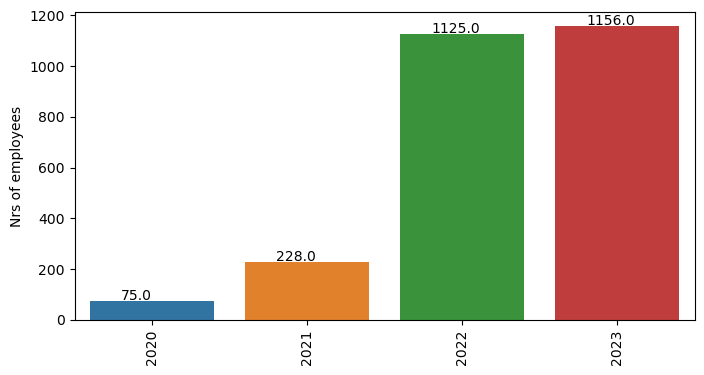

In [16]:
countplot('work_year')

### Nivel de experiencia
    'MI' : 'MID', 'SE': 'SENIOR', 'EN' : 'ENTRY', 'EX': 'EXPERT'
    Grande maioria dos empregados são senior

In [40]:
print(ds.groupby('experience_level').work_year.count())

experience_level
EN     270
EX      96
MI     664
SE    1554
Name: work_year, dtype: int64


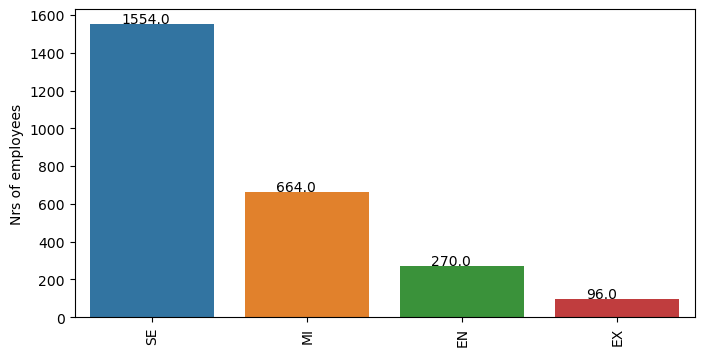

In [93]:
countplot('experience_level')

### Tipo de Emprego

    'PT':'Part-time', 'FT' : 'Full-time', 'CT' : 'Contract', 'FL' : 'Freelance'
    A grande maioria dos empregados na area de dados trabalham a tempo inteiro...

In [42]:
print(ds.groupby('employment_type').work_year.count())

employment_type
CT      10
FL      10
FT    2547
PT      17
Name: work_year, dtype: int64


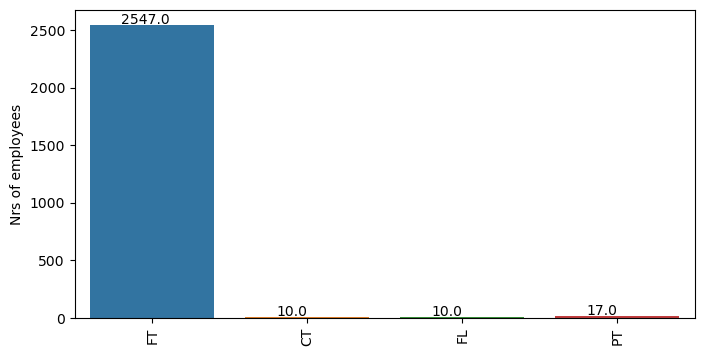

In [94]:
countplot('employment_type')

### Titlos de Trabalho
    Tres posicoes apresentam maiores numeros de empregados: 
        1 - Engenheiro de Dados;
        2 - Cientista de Dados; e
        3 - Analista de Dados.

In [18]:
print(ds.groupby('job_title').work_year.count())

job_title
3D Computer Vision Researcher     4
AI Developer                     11
AI Programmer                     2
AI Scientist                     16
Analytics Engineer               91
                                 ..
Research Engineer                33
Research Scientist               65
Software Data Engineer            2
Staff Data Analyst                1
Staff Data Scientist              1
Name: work_year, Length: 93, dtype: int64


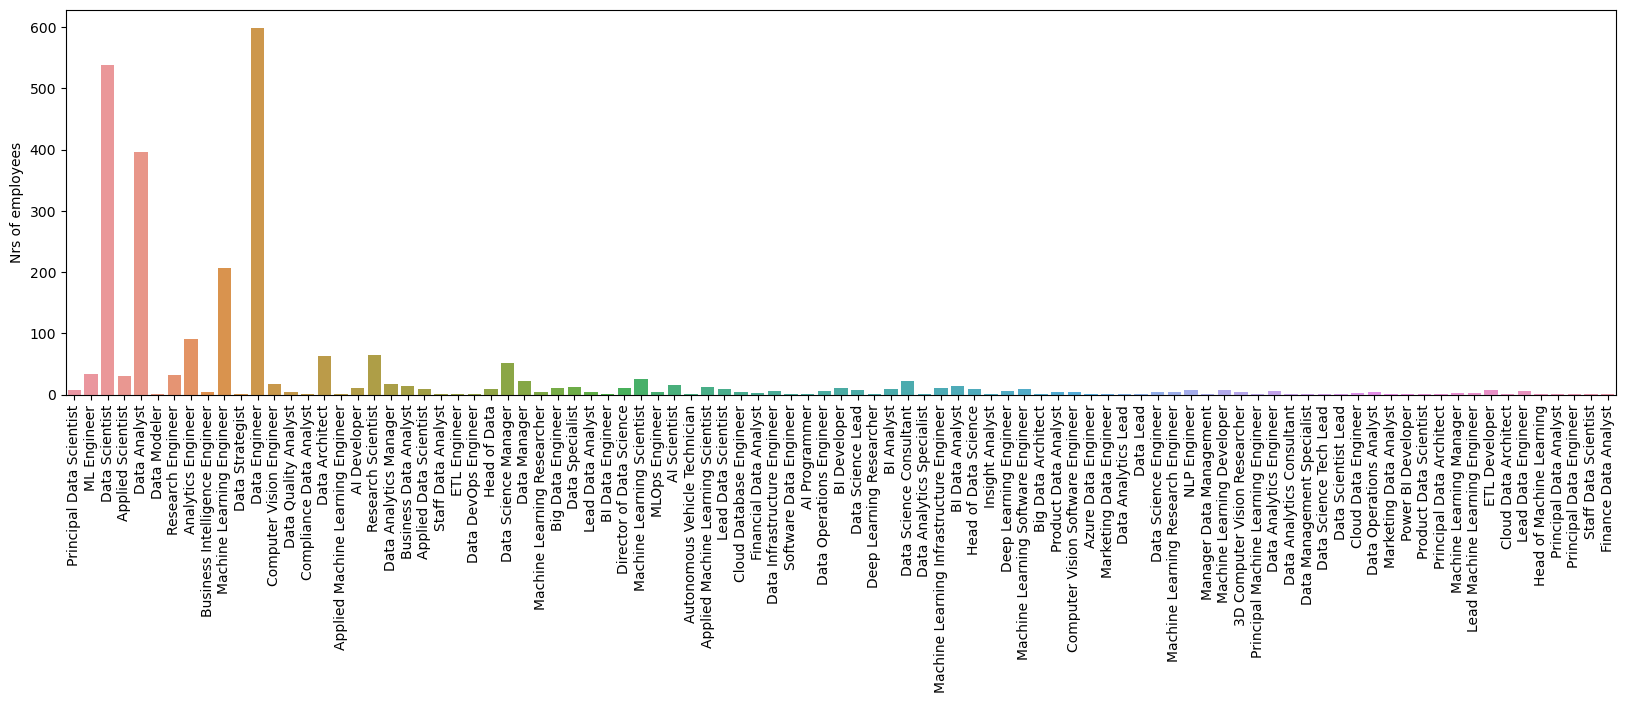

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=ds, x='job_title')
ax.set_xlabel('')
ax.set_ylabel('Nrs of employees')
plt.xticks(rotation=90)
plt.show()

### Moeda de Pagamento
    A grande maioria é pago em USD.

In [46]:
print(ds.groupby('salary_currency').work_year.count())

salary_currency
AUD       9
BRL       6
CAD      25
CHF       4
CLP       1
CZK       1
DKK       3
EUR     200
GBP     144
HKD       1
HUF       3
ILS       1
INR      59
JPY       3
MXN       1
PLN       5
SGD       6
THB       2
TRY       3
USD    2107
Name: work_year, dtype: int64


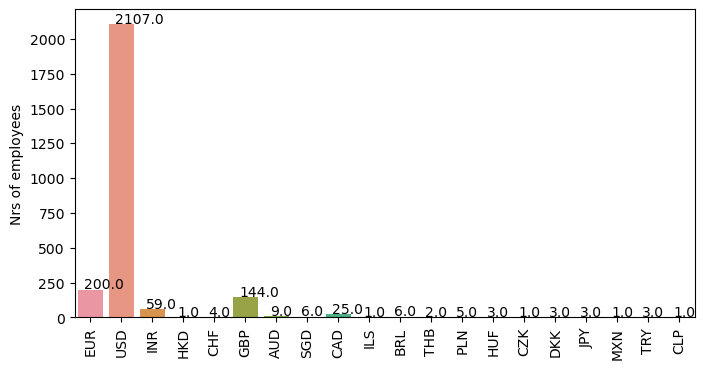

In [95]:
countplot('salary_currency')

### Residencia do Funcionario
    A grande maioria vivem nos Estados Unidos.

In [48]:
print(ds.groupby('employee_residence').work_year.count())

employee_residence
AE       3
AM       1
AR       6
AS       2
AT       6
      ... 
TR       5
UA       4
US    1893
UZ       2
VN       3
Name: work_year, Length: 78, dtype: int64


### Rácio de distância
    Ha um equilibrio entre o trabalho totalmente remoto e não remoto... não remoto ainda liderando ligeiramente.

In [101]:
ds['remote_ratio'] = ds['remote_ratio'].map({0: 'No Remote', 50: 'Partial Remote', 100: 'Fully Remote'})

In [104]:
print(ds.groupby('remote_ratio').work_year.count())

remote_ratio
Fully Remote      1643
No Remote         1923
Partial Remote     189
Name: work_year, dtype: int64


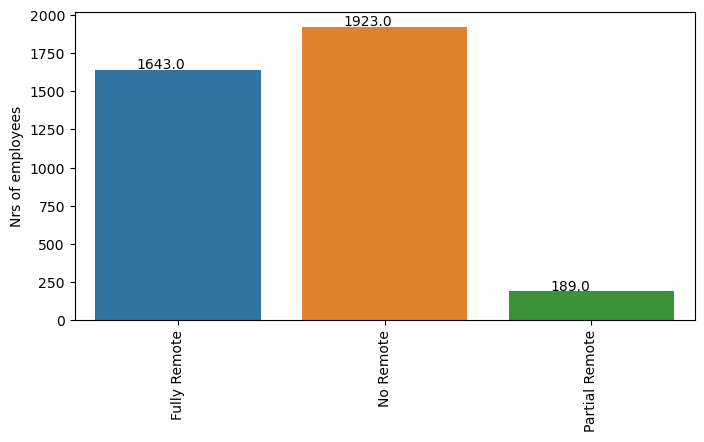

In [102]:
countplot('remote_ratio')

### Localizacao da Empresa
    A grande maioria estao nos Estados Unidos.

In [20]:
print(ds.groupby('company_location').work_year.count())

company_location
AE       3
AL       1
AM       1
AR       3
AS       3
      ... 
TH       3
TR       5
UA       4
US    3040
VN       1
Name: work_year, Length: 72, dtype: int64


### Tamanho da Empresa
    'L': 'Large','S':'Small','M':'Medium'
    As medias empresas apresentam maior taxa de empregabilidades de profissionais da area de dados.

In [107]:
print(ds.groupby('company_size').work_year.count())

company_size
L     454
M    3153
S     148
Name: work_year, dtype: int64


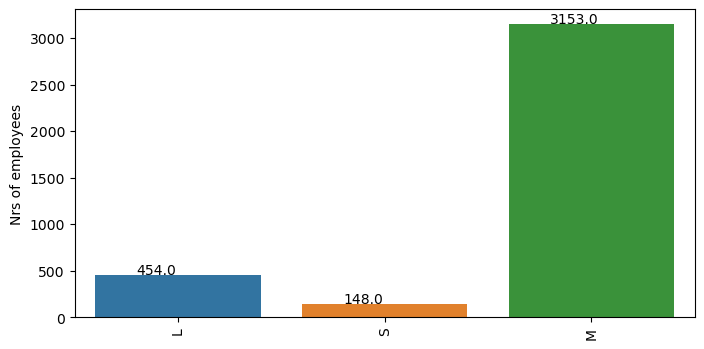

In [108]:
countplot('company_size')

## Estatistica Descritiva

In [53]:
display(ds['salary_in_usd'].describe())

count      2584.000000
mean     133409.280186
std       67136.837329
min        5132.000000
25%       84975.000000
50%      130000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

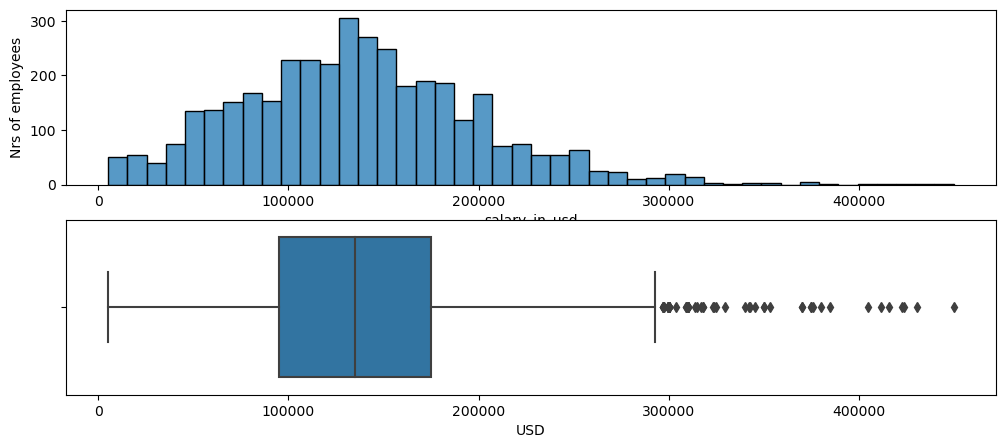

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
sns.histplot(ds, x='salary_in_usd', ax=ax[0])
sns.boxplot(data=ds, x='salary_in_usd', ax=ax[1])
ax[0].set_ylabel('Nrs of employees')
ax[1].set_xlabel('')
ax[1].set_xlabel('USD')
plt.show()

## Análise Multivariada

        Qual é o cargo que aufere o salário mais elevado?
        Qual é o salário médio para cada nível de experiência?
        Qual é o salário médio das empresas de grande, pequena e média dimensão?
        As pessoas que trabalham a tempo inteiro ganham mais do que os trabalhadores contratados?
        O salário dos trabalhadores que trabalham à distância é inferior ao dos que trabalham no escritório?
        Que país paga mais aos trabalhadores?
        Qual é a profissão mais bem remunerada nos países que pagam mais?
        Quais são os cargos mais bem pagos a nível de especialista?
        Quais são as funções mais bem remuneradas a nível sénior?
        O salário das funções de ciências dos dados tem aumentado ao longo dos anos?
        Qual é a tendência dos salários pagos por uma empresa de média dimensão ao longo dos anos?
        Qual é a tendência dos salários pagos por uma empresa de grande dimensão ao longo dos anos?
        Qual é a tendência dos salários pagos por uma empresa de média dimensão ao longo dos anos?

## FUNCOES

In [117]:
def barplot(feature, dataset, title):
    data = ds.groupby(feature)['salary_in_usd'].mean()
    plt.figure(figsize=(8, 15))
    ax = sns.barplot(data.values, data.index)
    ax.set_xlabel('Salary (USD)')
    ax.set_ylabel('')
    ax.set_title(title)
    plt.show()

In [ ]:
def boxplot(x, y, dataset, title):
    plt.figure(figsize=(8, 4))
    avg_sals = dadtaset.groupby([x])[y].mean()
    
    

### Qual é o cargo que aufere o salário mais elevado?

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


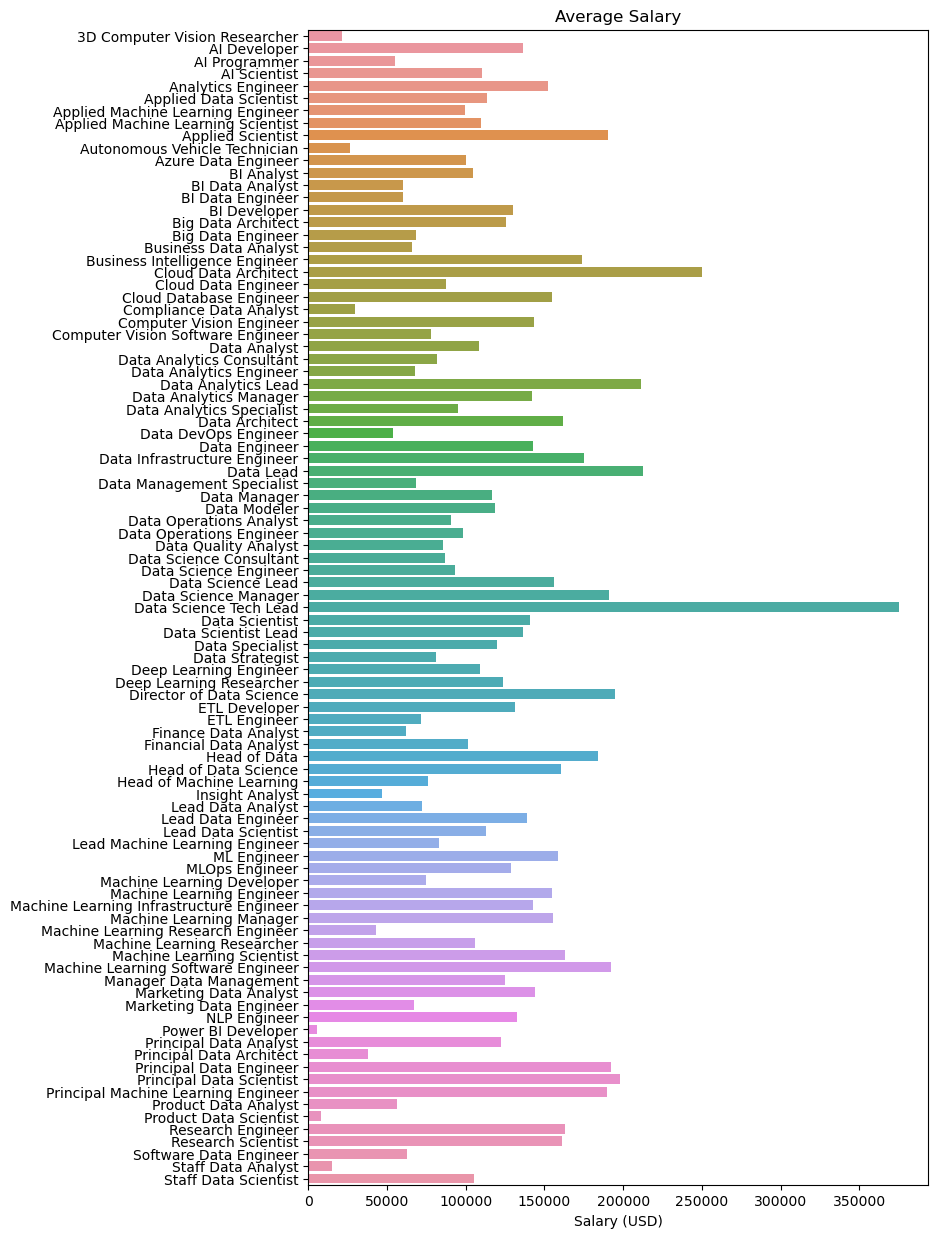

In [118]:
barplot('job_title', ds, 'Average Salary')

### Qual é o salário médio para cada nível de experiência?